## Prediction using Supervised ML

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they spend on study. This is Beginner level task to understand Supervised ML with two variable columns only.

### Author: Navej Ramjan Pathan

**Not for distribution.**

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
#loading dataset
df=pd.read_csv('griptask1.csv')
print("Data imported successfully")
df.head()


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()
# Using .info function we come to know about general information of datset like column name , column data type etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()
# using .describe function we come to know the central tendancy measure of datset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()
# Using .isnull function we come to know there is not any null value in datset

Hours     0
Scores    0
dtype: int64

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

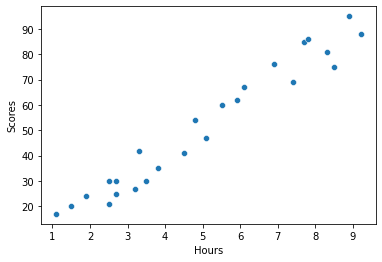

In [6]:
sns.scatterplot(x='Hours',y='Scores',data=df)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

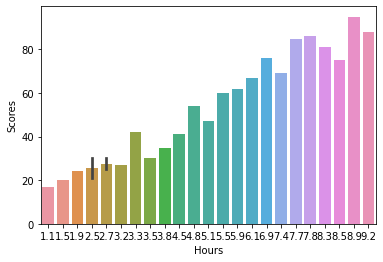

In [7]:
sns.barplot(x='Hours',y='Scores',data=df)

### From above two visualization we can conclude that there is linear relationship between  hours spend by student on study and marks obtain by them.
          

### Univariate analysis of columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

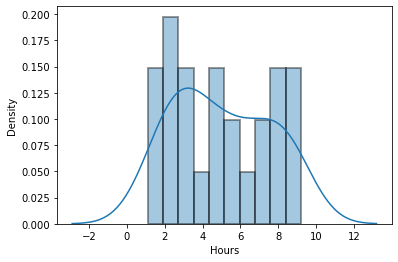

In [8]:
sns.distplot(df['Hours'],bins=10,hist_kws=dict(edgecolor='black',linewidth=2))


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

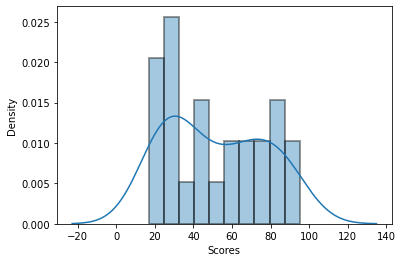

In [9]:
sns.distplot(df['Scores'],bins=10,hist_kws=dict(edgecolor='black',linewidth=2))

### From above two distribution graph we come to know that data is somewhat normally distributed in nature.

In [10]:
df.corr()
# Using .corr function we are checking corelation between dependant and independant variable.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

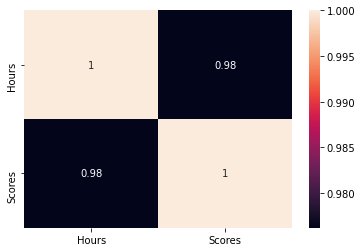

In [11]:
sns.heatmap(df.corr(),annot=True)
# visualizing corelation for better understanding

### Plotting Linear Reggresion Line 

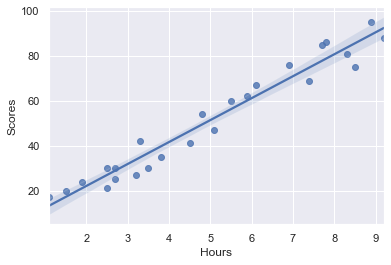

In [12]:
sns.set_theme(color_codes=True)
ax = sns.regplot(x="Hours", y="Scores", data=df)

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X=df[['Hours']]
y=df[['Scores']]



In [14]:
# Importing sklearn library and inbuilt train_test_split method to divide data into two parts. i.e. train datset and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=15)

### Training the Algorithm

In [15]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train,y_train)
print("Training complete.")

Training complete.


In [16]:
clf.coef_

array([[9.83774002]])

In [17]:
clf.intercept_

array([3.07346939])

In [18]:
#print(X_test) # Testing data - In Hours
pedicted = clf.predict(X_test) # Predicting the scores
pedicted

array([[27.66781944],
       [40.45688147],
       [34.55423746],
       [53.2459435 ],
       [93.58067759]])

In [19]:
y_test

,Scores
16,30
22,35
2,27
1,47
6,88


In [20]:
# You can also test with your own data
hours = [[9.25]]
predictor = clf.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predictor[0]))

No of Hours = [[9.25]]
Predicted Score = [94.07256459]


### Evaluating the model

In [21]:
clf.score(X_test,y_test)

0.9350556142184708

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, pedicted)) 

Mean Absolute Error: 5.433984115813812


###### What will be predicted score if a student studies for 9.25 hrs/ day? 
###### No of Hours = [[9.25]]
###### Predicted Score = [94.07256459]




### Conclusion-- from above project we prededicted the score on the basis of number of hours  spend by student on study using linear regression .